# Isomap y LLE para ordenación de imágenes por sus grados de libertad


EN esta primera parte de la  práctica vamos a usar Isomap y LLE para disponer imágenes de personajes conocidos sobre un mapa bidimensional. Lo interesante de este ejercicio es que manejamos puntos de alta dimensionalidad (cada pixel es una característica del punto) y que Isomap y LLE son capaces de extraer los **'grados de libertad de la imagen'**, entendiendo por éstos las características visuales propias de los objetos representados (perfiles, intensidad luminosa, forma del objeto, poses,...).

Vamos a utilizar la base de datos que python ha incorporado a partir de la base de datos original 'Labeled Faces in the Wild'. Esta es una base de datos de 13000 imágenes de caras de 1680 personas (muchas con 2 o más fotos en ella). Puedes consultar la base de datos original en http://vis-www.cs.umass.edu/lfw/

Las imágenes se representan por su lista de valores de color de sus pixeles, son por tanto vectores de alta dimensionalidad.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=30)

print(faces.data.shape)
print(faces.images.shape)
print(faces.target_names)
print(faces.target)

Vamos a plotear varias imágenes para hacernos una idea del dataset. Las imágenes las hemos transformado a niveles de gris.

In [ ]:

# plot some images
fig, ax = plt.subplots(5, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(faces.data[i].reshape(62, 47), cmap='gray');

Como se ve de las dimensiones que hemos impreso, hay 2370 imágenes de tamaño 62x47 pixeles = 2914 características (variables) que representan la intensidad de gris.

Vamos a coger un único personaje (George Bush) y vamos a procesarlo con Isomap para hallar las disposiciones de sus fotos en un espacio 2D. Veamos que estructura es capaz de encontrar.

Primero defino una función para poder plotear las imágenes en el plano según sus coordenadas

In [ ]:
from matplotlib import offsetbox

# source: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

**Actividad 0:** 
**Parte 1:** Explica en este contexto el uso de Isomap respondiendo a estas preguntas:
+a) ¿Con qué valores calculamos la distancia entre dos elementos, es decir, qué son las características de los datos?
+b)¿Qué significa que dos imágenes están cerca?
+c)¿Vamos a conocer en algún momento qué forma o expresión matemática tiene la supuesta variedad donde están alojadas las imágenes? ¿Conocemos su dimensión intrínseca?
+d)¿Contienen los puntos hallados en el espacio embebido parte de la información original (intensidad de grises)? ¿Qué son esos puntos según la teoría en que se basa Isomap?

<font color='blue'>
    
**A)**  - El número de vecinos más próximos (k) o el radio de vecindad (ε)
    
    
**B)**  - Que tiene unas caracteristicas similares, ya que se ordenan con la distancia euclidea (por defecto)
    
    
**C)**  - No y si es el caso no se como sacarla
    
    
**D)**  - Si, las características intrísecas de la imagen
    
    
</font>
    

**Parte 2**
Ahora calculamos Isomap y disponemos las imagenes. Debes llamar a la función plot_components con el modelo de Isomap con sus parámetros n_components=2 y n_neighbors=?? Haz algunas pruebas con el número de vecinos para quedarte con la mejor. El concepto de mejor consiste en que las fotos se distribuyen sobre el plano, agrupadas por algunas características intrísecas de la imagen. 
Escribe en una caja a continuación **qué pruebas has hecho** y qué disposición de las fotos tiene la que has elegido como mejor.

In [ ]:
from sklearn.manifold import Isomap
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))

#El target de Bush es el número de índice del vector de nombres que se ha impreso antes
target_Bush = 6 

data = faces.data[faces.target==target_Bush]
images = faces.images[faces.target==target_Bush]
nombre=faces.target_names[target_Bush]

#Haz la llamada con el modelo correcto de Isomap
#n_neighbors = np.arange(10,100,10)
#for nn in n_neighbors:
plot_components(data, 
                model = Isomap(n_components=2,  n_neighbors=20), 
                images=images, thumb_frac=0.1)

In [ ]:
from sklearn.manifold import Isomap
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))

#El target de Bush es el número de índice del vector de nombres que se ha impreso antes
target_index = 6

data = faces.data[faces.target==target_index]
images = faces.images[faces.target==target_index]
nombre=faces.target_names[target_index]

#Haz la llamada con el modelo correcto de Isomap
plot_components(data, 
                model = Isomap(n_components=2, n_neighbors=10), 
                images=images, thumb_frac=0.1)

In [ ]:
from sklearn.manifold import Isomap
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))

#El target de Bush es el número de índice del vector de nombres que se ha impreso antes
target_index = 6

data = faces.data[faces.target==target_index]
images = faces.images[faces.target==target_index]
nombre=faces.target_names[target_index]

#Haz la llamada con el modelo correcto de Isomap
plot_components(data, 
                model = Isomap(n_components=2, n_neighbors=5), 
                images=images, thumb_frac=0.1)

<font color='blue'>
    
Hemos ejecutado 3 valores distintos de "n_components" (20, 10, 5). En aspectos generales, observamos que las imágenes van escalando en intensidad de grises en el eje "Y", por lo que respecta al eje "X" notamos que en el centro las caras tienen a mirar al centro y él los laterales a mirar a las esquinas, pero sin relación directa, ya que en ambos extremos las miradas van tanto a izquierda como derecha.

Comentar que la mejor clasificación la hemos encontrado para el valor 10. 
        
</font>

**Actividad 00:**
Experimenta con al menos dos personajes más. Configura el sistema para algún personaje del cual tengamos en la base de datos al menos 50 fotografías (encuentra el parámetro en el código). Indica cuáles son a tu parecer las características intrínsecas que se están proyectando con las nuevas caras. Escríbelo en una caja a continuación.

In [ ]:
faces2 = fetch_lfw_people(min_faces_per_person=50)

print(faces2.data.shape)
print(faces2.images.shape)
print(faces2.target_names)
print(faces2.target)

In [ ]:
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))

target_index = 1

data = faces2.data[faces2.target==target_index]
images = faces2.images[faces2.target==target_index]
nombre=faces2.target_names[target_index]

#Haz la llamada con el modelo correcto de Isomap
plot_components(data, 
                model = Isomap(n_components=2, n_neighbors=2), 
                images=images, thumb_frac=0.1)

<font color='blue'>
Conforme van disminuyendo los valores del eje Y y van aumentado los valores del eje X, la claridad de las imágenes aumenta. Además, los la orientación de la cara varía en función de los valores en el eje X.
</font>

In [ ]:
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))

target_index = 9

data = faces2.data[faces2.target==target_index]
images = faces2.images[faces2.target==target_index]
nombre=faces2.target_names[target_index]

#Haz la llamada con el modelo correcto de Isomap
plot_components(data, 
                model = Isomap(n_components=2, n_neighbors=2), 
                images=images, thumb_frac=0.1)

<font color='blue'>
Conforme aumentan los valores del eje X, aumenta la oscuridad de las imágenes y cambia la orientación de la cara.
</font>

## Isomap con un conjunto de imágenes de objetos. Agrupación por similaridad

También en ciertos problemas de imágenes, Isomap descubre características intrínsecas de las imágenes que están relacionadas con las formas de los objetos que representan y permiten agruparse a éstos por su apariencia visual (cosa no trivial ya que una imágen en la forma en que la procesamos en Isomap no es mas que un conjunto de pixeles sin coherencia visual entre ellos en principio).

Para hacer esta parte, debes bajarte una base de datos de fotos de objetos de la Universidad de Columbia (EE.UU.) que puedes encontrar en https://www1.cs.columbia.edu/CAVE/software/softlib/coil-100.php

Modifica los caminos de las instrucciones de abajo para cargar la base de datos de imágenes.

**Nota Importante** Cuando descargues la base de datos de objetos en tu ordenador, hay dos ficheros que no tienen extensión 'png' (no son imagenes). Debes eliminarlos de la carga de imágenes o te dará error.

In [ ]:
import os
import matplotlib.image as img
from skimage.color import rgb2gray
os.getcwd()

def get_sample(path):
    ix = [int(i) for i in np.arange(0, len(os.listdir(path)), 72)]
    object_files = [os.listdir(path)[i] for i in (ix)]

    data = []
    for file in object_files:
        data.append(rgb2gray(plt.imread(path + '/' + file)))
    data = np.array(data)
    images = data
    data = data.reshape(100, 128*128)
    return data, images

path = './coil-100/coil-100/coil-100'
#path = 'C:\\Users'
sample_data, sample_images = get_sample(path)
sample_data.shape
sample_images.shape

Vamos a hora a aplicar Isomap al conjunto de imágenes y vamos a seleccionar unas cuantas para visualizarlas en la proyección que ha obtenido Isomap.

In [ ]:
#Creditos: Drew Wilimitis

from sklearn.manifold import Isomap
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(figsize=(14, 11))
#Introduce en número de dimensiones de salida a 2
plot_components(sample_data,
                model=Isomap(n_components=2),
                images=sample_images[:, ::2, ::2],
                thumb_frac=0.07)

**Actividad 00bis:** Indica si Isomap es capaz de captar algunas estructuras de las imagenes y cuáles te parece que son. 




<font color='blue'>
Conforme aumenta el valor en el eje Y, las imágenes tienen menos fondo y, conforme aumenta el valor en el eje X, los objetos de las imágenes son más verticales.
    
Además, ISOMAP es capaz de agrupar las imágenes de tazas, coches, gatos, palas... Es decir, agrupa objetos similares.
</font>

Insertemos ahora un nuevo código capaz de seleccionar imagenes de la base de datos para centrarnos en unos pocos objetos:

In [ ]:
# read in all the images for a collection of objects
def get_objects(path, keys):
    obj_keys = ['obj' + str(key) + '__' for key in keys]
    data = []
    for obj_key in obj_keys:
        object_files = [x for x in os.listdir(path) if obj_key in x]
        for image in object_files:
            data.append(rgb2gray(plt.imread(path + '/' + image)))

    data = np.array(data)
    images = data
    data = data.reshape(len(keys)*72, 128*128)
    return data, images
# select a set of indices for object images
objects = np.arange(1, 90, 15)
object_data, object_images = get_objects(path, objects)
object_data.shape
object_images.shape

Hemos seleccionado imágenes de objetos con  varias formas muy distintas.
Vamos a visualizarlos ejecutando el código de abajo:

In [ ]:
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(object_images[(i+1)*24 - 4], cmap='gray');

**Actividad 000:** Vamos a aplicar Isomap a dicho dataset. Estudia la configuración del hiperparámetro del algoritmo, para ello prueba con valores en diferentes rangos. Explica tus resultados en una caja a continuación.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=5),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=15),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=30),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

<font color='blue'>
    
Hemos ejecutado 3 valores distintos de "n_components" (5, 15, 30)

 - 5) Aquí ISOMAP no representa como nos gustaría y nos deja entrever el formato en espiral que tienen originalmente los datos, esto es dado, ya que el parámetro k (n_components) debe ser alto para evitar "atajos lineales" en zonas de alta curvatura de la variedad. 

- 15) En este caso, aunque la clasificación no es acertada del todo, nos vamos acercando un poco.
    

- 30) Aquí la clasificación es casi perfecta, solo llegando a confundirse cuando ciertas cajas tienen formas parecidas a otras figuras
        
</font>

**Actividad 0000**
Prueba lo anterior con otro grupo de imágenes. Describe las pruebas y los resultados en una caja a continuación.

In [ ]:
# read in all the images for a collection of objects
def get_objects(path, keys):
    obj_keys = ['obj' + str(key) + '__' for key in keys]
    data = []
    for obj_key in obj_keys:
        object_files = [x for x in os.listdir(path) if obj_key in x]
        for image in object_files:
            data.append(rgb2gray(plt.imread(path + '/' + image)))

    data = np.array(data)
    images = data
    data = data.reshape(len(keys)*72, 128*128)
    return data, images
# select a set of indices for object images
objects = np.arange(10, 90, 15)
object_data, object_images = get_objects(path, objects)
object_data.shape
object_images.shape

In [ ]:
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(object_images[(i+1)*24 - 4], cmap='gray');

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=15),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=30),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=50),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

<font color='blue'>
Hemos ejecutado 3 valores distintos de "n_components" (15, 30, 50), esta vez hemos optado por aumentar los valores de k por lo aprendido en el punto anterior
    

- 15) Aquí ISOMAP clasifica correctamente
    

- 30) En este caso, aunque la clasificación no es acertada del todo, sí que se pueden distinguir los grupos, también notar que peor agrupamiento también se deja imágenes por coger.
    

- 30)Aquí ISOMAP no representa como nos gustaría, sí que es mejor pasarse que quedarse corto, pues aunque con fallas, la agrupación no es completamente anárquica.
    
</font>

**Actividad 000bis** ¿Consigue Isomap agrupar las imágenes en las clases de formas correctas?. ¿Que grados de libertad encuentra en cada eje?

<font color='blue'>
En general, sí que agrupa correctamente, si los datos de entrada que están sobre la variedad (manifold)
tienen mucho ruido (como es el caso), aunque comentar que es muy sensible a los hiperparámetros, pero en este caso es mejor pasarse que quedarse corto. 


**Grados de libertad:** Altura en el eje "Y" y Anchura en el eje "X"
    
    
</font>

<font color='blue'>

</font>

# LLE con imagenes
Vamos a probar el algoritmo LLE con el banco de caras anterior y, específicamente . con la caras de George W. Bush.

Debes importar ahora el algoritmo LLE. Búscalo en scikit.

Este algoritmo lo llamará la función anterior que ya conocemos plot_components(). 
**Actividad 00000: ** Debes preprarar el modelo, igual que Isomap, con los parámetros n_components para dos dimensiones y n_neighbors=??  . Vuelve a hacer pruebas para ver con que valores de construcción de la localidad te sale mejor. Describe los resultados a continuación

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

target_index = 6

np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))
data = faces.data[faces.target==target_index]
images = faces.images[faces.target==target_index]
nombre=faces.target_names[target_index]

#Introduce/estudia los parámetros de lle aquí
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10) 

print(nombre)
plot_components(data, model=lle, images=images, thumb_frac=0.1)

**Actividad 1** 
Repara en que es lo que estamos haciendo con LLE. 
+a) ¿Qué dimensiones iniciales tiene cada vector que representa una imagen?. ¿Dónde se proyectan en la salida, es decir, con cuantas dimensiones?
+b) ¿Qué diferencia hay en la organización de los puntos embebidos usando LLE respecto a la que hace Isomap?

+c) Compara las proyecciones de los puntos en el espacio 2d de Isomap con las obtenidas con LLE. ¿Qué parecidos/diferencias encuentras? ¿Las dos proyectan en los dos ejes (abcisas/ordenadas) los mismos grados de libertad (ej. luminosidad,perfil, arriba/abajo, ojos abirtos/cerrados, boca abierta/cerrada)?

<font color='blue'>
    
- a) En principio, la imagen tiene 3 dimensiones y se proyecta con 2 dimensiones.

- b) En LLE la vecindad de cada punto del dataset queda preservada en el conjunto embebido tanto en distancias como en colocación (quien está al lado de quién). Así se preservan las configuraciones locales de los vecinos más próximos.
    
- c) Ambas proyectan el brillo de las imágenes como grado de libertad.
    
</font>

**Actividad 2** La implementaciónd de LLE de python proporciona también como dato el error de reconstrucción. Ejecuta el algoritmo LLE en un bucle para vecindades k desde 3 a 20 y guárdate en un vector los errores de reconstrucción para dichas ejecuciones.
Represénta en una gráfica los errores de reconstrucción donde en abcisas esté el número de iteración.
Justifica la tendencia creciente o decreciente de la gráfica que te sale.

In [ ]:
np.random.seed(8888)

vecindades = np.arange(3,21)
errores = []

for k in vecindades:
    #Introduce/estudia los parámetros de lle aquí
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=k) 
    lle.fit_transform(data)
    errores.append(lle.reconstruction_error_)

In [ ]:
plt.plot(errores)

<font color='blue'>
Conforme aumenta el número de vecinos, aumenta el error de reconstrucción. A partir de la iteración 11, el error de reconstrucción va disminuyendo. Es imposible reconstruir por completo la base de datos, es por ello que el error aumenta, aunque va disminuyendo a partir de un cierto número de vecinos (la reconstrucción se aproxima a la base de datos original).
</font>

# LLE con un dataset sintético

Vamos a aplicar LLE a una variedad sintética algo compleja para ver cómo es capaz de recoger su estructura no lineal y proyectarla en 2D.

Generamos una superficie en forma de 'silla de montar' con dos picos.

In [ ]:
plt.style.use('default')
n = 5000
param = 1
xy = 1 - 2 * np.random.rand(2, n)
p = np.array([xy[1, :], xy[0, :], param * np.sin(np.pi * xy[0, :]) * np.tanh(3 * xy[1, :])]).T
color = p[:, 2]
fig = plt.figure(figsize = (9, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[:, 0], p[:, 1], p[:, 2], c=color, cmap=plt.cm.jet)
plt.title('"Twin Peaks" Dataset', size=12)
ax.view_init(20, -19);

**Actividad 2(bis)** Aplica a este dataset el algoritmo LLE. Proyéctalo a un espacio de dos dimensiones y haz un estudio para el hiperparámetro del número de vecinos que constituye una localidad de cada punto, indicando los resultados que has obtenido para cada valor en términos de la organización en el plano de los datos embebidos (si se agrupan los datos que inicialmente estaban juntos en la variedad)  y de su error de reconstrucción. Escribe los resultados en una caja a continuación.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
#aplica aquí la llamada a LLE (puedes configurar un bucle, 
#pero entonces debes reescribir el código de visualización de las imagenes
#que está pensado para representar solo un resultado)
#o bien puedes ejecutarlo uno a uno y describir el resultado en la caja
#y dejar en el código la configuración que decides como mejor
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20) 

X_reduced = lle.fit_transform(p)
fig = plt.figure(figsize = (5, 5))
plt.title('LLE with k = 20', size=12)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.jet);

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50) 

X_reduced = lle.fit_transform(p)
fig = plt.figure(figsize = (5, 5))
plt.title('LLE with k = 50', size=12)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.jet);

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=100) 

X_reduced = lle.fit_transform(p)
fig = plt.figure(figsize = (5, 5))
plt.title('LLE with k = 100', size=12)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.jet);

**Actividad 3**  ¿Cuál es el número de vecinos que te proporciona un mejor LLE?

<font color='blue'>
    Los mejores resultados los hemos obtenido con k=20 vecinos.
</font>

# LLE con secuencias de  imagenes (Tracking)
Otra de las aplicaciones en las que se usan tanto Isomap como LLE es en el tracking de imágenes. El tracking consiste en ordenar una serie de imágenes de tal manera que represente una secuencia. Lo más habitual es que las imágenes representes algún objeto o ser vivo en movimiento y el sistema de tracking las ordene en una secuencia.

Vamos a crear nuestra propia secuencia superponiendo a una imáges de ruido blanco (que se supone que hace de fondo neutro) las imágenes en distintas posiciones de un barco. El objetivo es que LLE encuentre ese patrón de desplazamiento y ordene los grupos de imágenes por posiciones similares.

Carga la imagen 'barco.png' que se te proporciona. Primero la vamos a convertir a grises y la vamos a reducir de resolución para que nos quepa en el fondo de ruido.

In [ ]:
import cv2
import matplotlib.image as img
from skimage.color import rgb2gray
plt.style.use('default')

# read in the image
image = cv2.imread("./barco.png")
# convert to gray and resize
print(image.shape)
image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#image = object_images[153]
res = cv2.resize(image, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

plt.subplot(121)
plt.title('Original 128x128')
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.title('Resized 32x32')
plt.imshow(res,cmap='gray')
plt.show();

Vamos a crear ahora una imagen de 64x64 pixels de ruido blanco. Para ello carga en un array llamado test_img 64x64 valores aleatorios entre 0 y 255

In [ ]:
# create image with random noise
test_img = np.random.randint(256, size=(64, 64))
plt.imshow(test_img,cmap='gray');

**Actividad 4** Ahora vamos a crear la secuencia de imagenes sobre fondo de ruido. Almacenaremos la secuencia en la lista 'images'. Vamos a ir moviendo el barco para cada una de las 64/2 filas del fondo, en cada una de sus 64/2 columnas (para que quepa la imagen completa).
Deberia quedarte algo como esto:
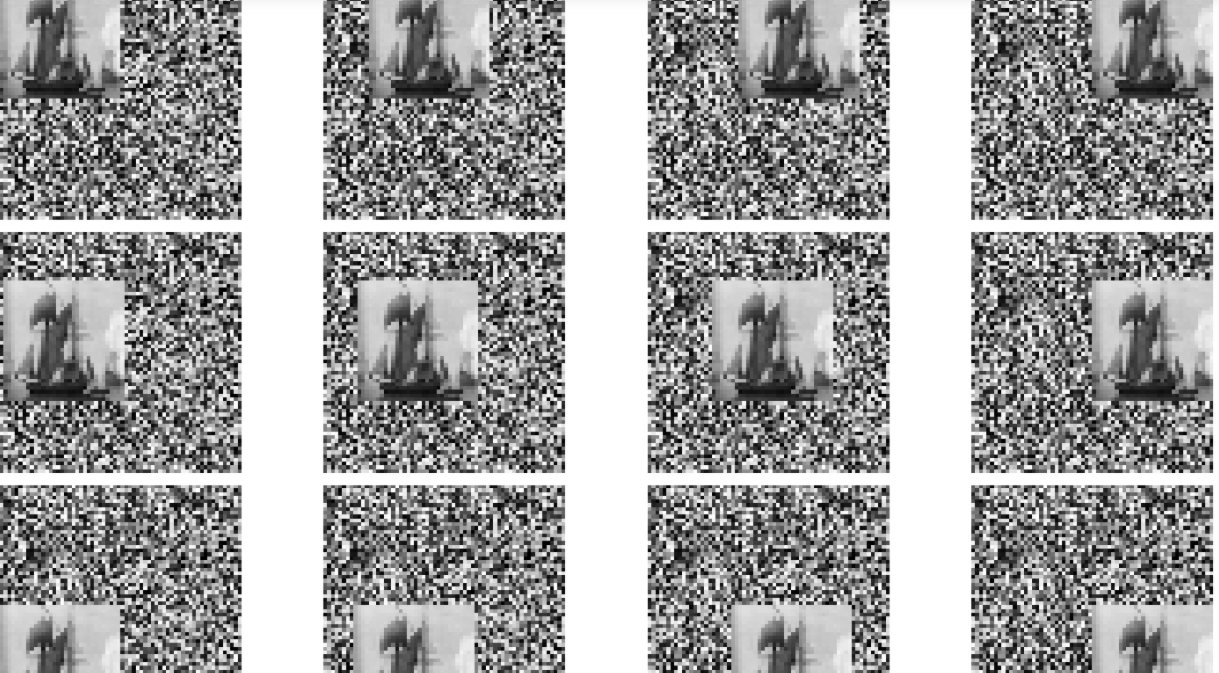


In [ ]:
# iterate and create shifted images
images = []
for i in range(33):
    for j in range(33):
        tmp = np.copy(test_img)
        # desliza el barco a lo largo del fondo durante 32 columnas para cada fila (de las primeras 32)
        #piensa cómo debes configurar los rangos de los índices para poner el barco
        tmp[i:i+32, j:j+32] = res
        images.append(tmp);

Ahora vamos a visualizar el resultado:

In [ ]:


#plt.imshow(res,cmap='gray')        
# plot some of the generated images
F = plt.figure(figsize=(15,10))
G = plt.GridSpec(3, 4, left=.01, right=.99, bottom=0.05, top=0.9, wspace=.01, 
                 hspace=0.05, figure=F)
ax = plt.subplot(G[0])
_ = ax.imshow(images[0], cmap='gray')
selected_images = [0, 12, 24, 32, 430, 438, 446, 461, 1056, 1064, 1078, 1088]
ax.set_axis_off()
ax.set_aspect('equal')
for i in range(1, 12):
    ax = plt.subplot(G[i])
    _ = ax.imshow(images[selected_images[i]], cmap='gray')
    ax.set_axis_off()
    ax.set_aspect('equal');

Utiliza el codigo siguiente para llamar a LLE y luego visualizar la proyección 2D que obtenemos.

In [ ]:
X = np.array(images).reshape(1089, 4096)
#Pon en esta variable el número de vecinos para la reconstrucción
k=20
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=k)
X_reduced = lle.fit_transform(X)
fig = plt.figure(figsize = (8, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title('LLE with k = '+str(k), size=12);

**Cuestión 1** Sin visualizar todavia la correspondencia de los puntos obtenidos con las imágenes originales ¿Qué puedes decir del dataset observando la disposición de los puntos en el espacio bidimensional? Responde a continuación

<font color='blue'>
Los puntos están muy cerca los unos de los otros, lo cual quiere decir que las imágenes son muy similares.
</font>

Vamos ahora a superponer a la proyección algunas de las imágenes correspondientes.

In [ ]:

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap, zoom=1),
                                      proj[i])
            ax.add_artist(imagebox)
        for i in selected_images:
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap='gray'), 
                proj[i])
            ax.add_artist(imagebox)

In [ ]:
plt.figure(figsize=(8,8))
plot_components(X,
                model=LocallyLinearEmbedding(n_components=2, n_neighbors=k),
                thumb_frac=0.3,
                images=images);

**Cuestión 1 bis:** ¿Qué grados de libertad de las imágenes originales ha reproducido en el el espacio bidimensional el algoritmo LLE?



<font color='blue'>
El desplazamiento de la imagen sobre el ruido blanco.
</font>